In [38]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import linear_model #Linear Regression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.cluster import KMeans # KMeans clustering - USE this
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

In [39]:
# Load data set and display first few observations
allData = pd.read_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/personalityTrainingSet.csv')
allData.head()

,name,id,Adventurousness,Artistic,Emotionality,Imagination,Intellect,Authority-challenging,Achievement striving,Cautiousness,...,Modesty,Uncompromising,Sympathy,Trust,Fiery,Prone to worry,Melancholy,Immoderation,Self-consciousness,Susceptible to stress
0,khalid,thegreatkhalid,0.289929,0.419177,0.611349,0.451715,0.418760,0.595870,0.132787,0.269627,...,0.671788,0.364850,0.441565,0.422446,0.574548,0.693564,0.749595,0.637611,0.832918,0.805832
1,Demi Lovato,ddlovato,0.558477,0.821187,0.164509,0.067900,0.493812,0.424660,0.624273,0.568843,...,0.178534,0.250469,0.543368,0.571345,0.395505,0.377350,0.871895,0.573643,0.843157,0.228196
2,Lorde,lorde,0.176554,0.204484,0.124816,0.834964,0.746770,0.041458,0.394195,0.390194,...,0.463856,0.313432,0.834038,0.982120,0.417224,0.887227,0.121514,0.409114,0.357946,0.276534
3,Alan Walker,IAmAlanWalker,0.973777,0.860684,0.149549,0.310300,0.238432,0.089397,0.718577,0.367340,...,0.137003,0.685742,0.276210,0.363765,0.325340,0.243153,0.304742,0.898904,0.833510,0.268159
4,Kanye West,KanyeOfficiaI,0.862089,0.926088,0.491122,0.005692,0.651521,0.692878,0.910152,0.599616,...,0.630455,0.315458,0.833330,0.370085,0.609347,0.832296,0.181109,0.687820,0.373703,0.712242


In [40]:
#slice out  id's for later use
artistIDs = pd.DataFrame(allData.loc[:, 'name'])

#delete non-metric columns
allData.drop(['name','id'], inplace = True, axis = 1)

artistIDs.head()

,name
0,khalid
1,Demi Lovato
2,Lorde
3,Alan Walker
4,Kanye West


In [41]:
#check dimention of allData
allData.shape

(20, 30)

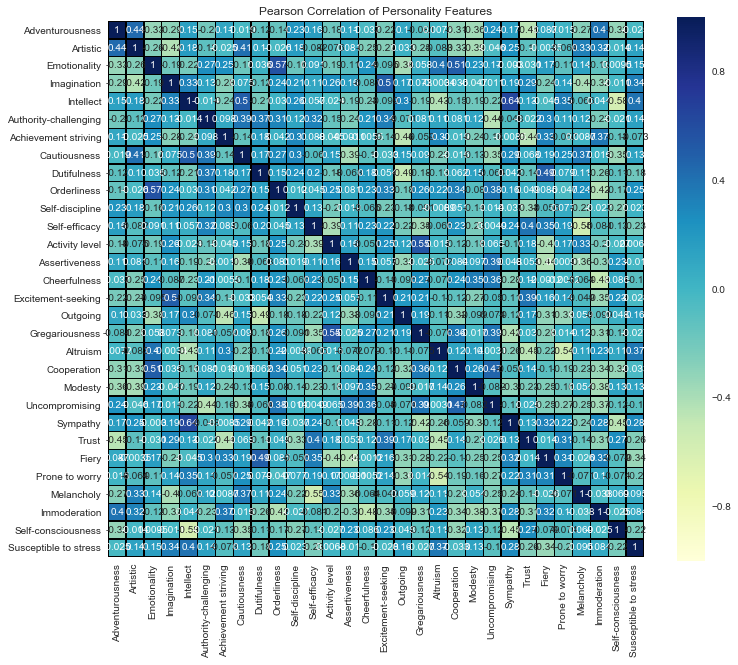

In [42]:
#set up the matplotlib
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Personality Features')

#Heatmap using seaborn
sns.heatmap(allData.astype(float).corr(), linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [43]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
from sklearn.preprocessing import StandardScaler
allData_std = StandardScaler().fit_transform(allData)
mean_vec = np.mean(allData_std, axis=0)
cov_mat = np.cov(allData_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [44]:
#make list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
len(cum_var_exp)  #30
cum_var_exp[16]
#len(var_exp)

(98.813661347870692+0j)

C:\Users\armch\Anaconda3\lib\site-packages\matplotlib\patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
C:\Users\armch\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


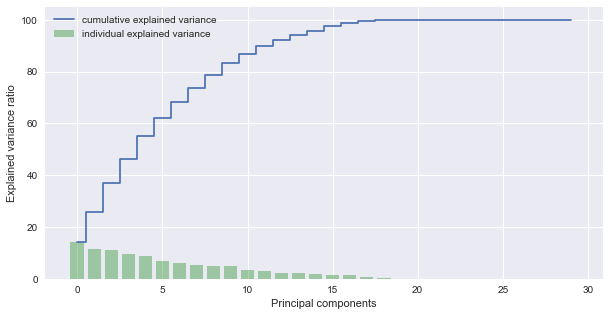

In [45]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(30), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(30), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [46]:
# >95% of the variance can be explained with the top 15 components
pca = PCA(n_components = 15)
allData_15d = pca.fit_transform(allData_std)
pd.DataFrame(allData_15d)
allData_15d.shape

(20, 15)

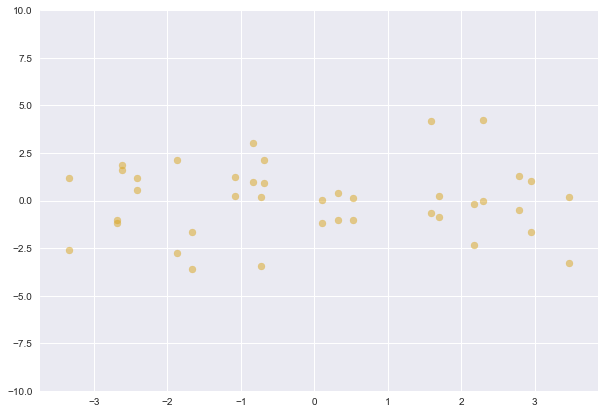

In [47]:
#plot the PCA model
plt.figure(figsize = (10,7))
plt.scatter(allData_15d[:,0],allData_15d[:,1], c='goldenrod',alpha=0.5)
plt.scatter(allData_15d[:,0],allData_15d[:,2], c='goldenrod',alpha=0.5)
plt.ylim(-10,10)
plt.show()

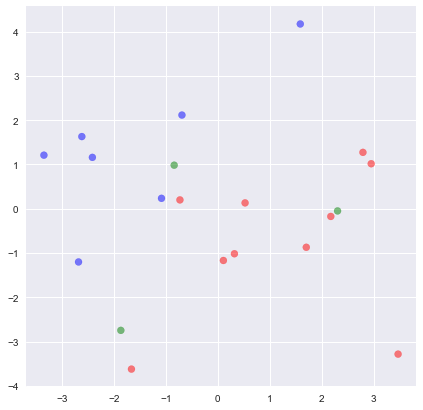

In [48]:
#3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
allData_clustered = kmeans.fit_predict(allData_15d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in allData_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(allData_15d[:,0],allData_15d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [49]:
# read artist personality as input
artistData = pd.read_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/khalidPersonalityData.csv')

#clean input data
artistData.drop(['id'], inplace = True, axis = 1)
artistData = pd.DataFrame(artistData)
artistData_avg = artistData
artistData_avg

# Standardize artist input average using fitting to Pop Data (trainig set)
artistData_avg_std = StandardScaler().fit(allData).transform(artistData_avg)
artistData_avg_std


# calculate the PC's for the standardized artist input fitting to standardized training set
artistPCA = pca.fit(allData_std).transform(artistData_avg_std)
artistPCA


array([[ 0.10707909,  0.05277233, -1.16883396,  0.76098037, -1.72404223,
        -1.77600442, -0.61435366, -1.24140951,  0.44776339,  0.36941989,
        -0.51229714, -0.51811767,  0.36129395,  1.66450242, -0.16427172]])

In [50]:
# Calculate Euclidean distance between genre data and input data
import scipy
euclDis = []
for j in range(len(allData_15d)):
    temp = scipy.spatial.distance.euclidean(allData_15d[j], artistPCA[0])
    euclDis.append(temp)
    
type(euclDis)

list

In [51]:
# add in the Disimilarity column to artists id's
artistIDs["Personality Disimilarity"] = pd.Series(list(euclDis), index = artistIDs.index)
artistIDs

,name,Personality Disimilarity
0,khalid,5.796016e-15
1,Demi Lovato,6.008902e+00
2,Lorde,6.647785e+00
3,Alan Walker,7.250562e+00
4,Kanye West,7.120209e+00
5,Hailee Steinfeld,7.629370e+00
6,Neck Deep,6.566239e+00
7,The Used,6.258343e+00
8,Knuckle Puck,5.156508e+00
9,With Confidence,7.010281e+00


In [55]:
simArtists_personality = artistIDs.nsmallest(6, 'Personality Disimilarity')
simArtists_personality['Personality Similarity Score'] = 100/ (1.1 ** simArtists_personality['Personality Disimilarity'])
simArtists_personality['Personality Similarity Score'] = simArtists_personality['Personality Similarity Score'].astype(int)
simArtists_personality = simArtists_personality[1:]


simArtists_personality.to_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/similarArtists_personality.csv')
simArtists_personality

,name,Personality Disimilarity,Personality Similarity Score
8,Knuckle Puck,5.156508,61
15,Pink Floyd,5.951024,56
1,Demi Lovato,6.008902,56
12,Kelsea Ballerini,6.092186,55
7,The Used,6.258343,55


In [67]:
simArtists_music = pd.DataFrame(pd.read_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/similarArtists_music.csv'))
simArtists_final = simArtists_personality

musicSimilarity = []
for name in simArtists_final['name']:
    score = simArtists_music.loc[simArtists_music['artist'] == name, 'Music Similarity Score'].values[0]
    #score = tempSet['artist'][0]
    musicSimilarity.append(score)

simArtists_final['Music Similarity Score'] = musicSimilarity
simArtists_final

simArtists_final.to_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/similarArtists_final.csv')

In [68]:
simArtists_final

,name,Personality Disimilarity,Personality Similarity Score,Music Similarity Score
8,Knuckle Puck,5.156508,61,67
15,Pink Floyd,5.951024,56,79
1,Demi Lovato,6.008902,56,86
12,Kelsea Ballerini,6.092186,55,83
7,The Used,6.258343,55,67


In [66]:
simArtists_music

,Unnamed: 0,artist,Genre,Disimilarity,Music Similarity Score
0,0,Demi Lovato,Pop,1.512028,86
1,1,Lorde,Pop,1.562240,86
2,2,Alan Walker,Pop,1.572959,86
3,3,Kanye West,Pop,1.600688,85
4,4,Hailee Steinfeld,Pop,1.671577,85
5,5,Neck Deep,Punk,3.651537,70
6,6,The Used,Punk,4.112517,67
7,7,Knuckle Puck,Punk,4.126566,67
8,8,With Confidence,Punk,4.383530,65
9,9,Coldfront,Punk,4.532263,64
